![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/logo_MCV_W.png)

# **DeepFace - Age, Gender, Expression, Headpose and Recognition**

---


In this lesson, we use the **DeepFace API for Age, Gender, Expression Facial and Recognition. We even use the headpose library to obtain head direction/tilt**. DeepFace is an easy to use python module that provides access to several Facial Detection and Recognition models. It's very simple to use to let's dive in.

1. Install the necessary modules and download our files
2. Demonstrate facial landmarks
3. Obtain Age, Gender, Emotional Expression and Ethnicity using DeepFace
4. Perform Facial Similarity
5. Perform Facial Recognition


**NOTE** Change to High-RAM setting.


## **1. Install the necessary modules and download our files**

In [ ]:
!pip install deepface
!pip install dlib

     |████████████████████████████████| 61 kB 2.8 MB/s 
     |████████████████████████████████| 2.3 MB 8.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.2.0-py3-none-any.whl size=14273 sha256=a68ca0faa0b7a3cb2602dc54d7d31308a167ee7d945d4effa054d816564ced88
  Stored in directory: /root/.cache/pip/wheels/8c/17/ff/58721d1fabdb87c21a0529948cf39e2be9af90ddbe4ad65944
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4


#### **Define our imshow function**

In [ ]:
# Some imports and our image viewing function
import dlib
import tarfile
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 6):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [ ]:
# Download facial landmarks
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/shape_predictor_68_face_landmarks.dat

Downloading...
From: https://drive.google.com/uc?id=1CYpEuzNpsBaUJ54wVN2m3VYSh2cdTRK5
To: /content/shape_predictor_68_face_landmarks.dat
100% 99.7M/99.7M [00:03<00:00, 32.8MB/s]


In [ ]:
# Download our test images and a test pic
!gdown --id 1RDw1BqsuZv4auJNv3iJ4ToIOnBq9WsVZ
!unzip -q face_recognition.zip
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/me.jpg

Downloading...
From: https://drive.google.com/uc?id=1RDw1BqsuZv4auJNv3iJ4ToIOnBq9WsVZ
To: /content/face_recognition.zip
100% 4.84M/4.84M [00:00<00:00, 21.4MB/s]
--2021-12-14 20:50:41--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/me.jpg
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/me.jpg [following]
--2021-12-14 20:50:41--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/me.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43804 (43K) [image/jpeg]
Saving to: ‘me.jpg’

me.jpg              100%[==============

## **2. Demonstrate facial landmarks**

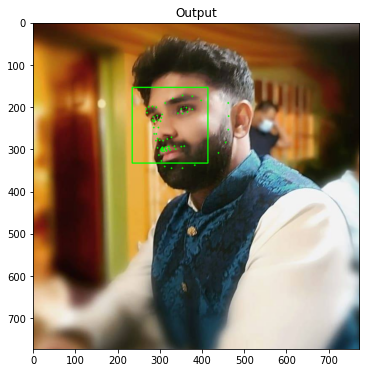

In [ ]:
from imutils import face_utils

p = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

image = cv2.imread('me.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
# Get faces 
rects = detector(gray, 0)

# For each detected face, find the landmark.
for (i, rect) in enumerate(rects):
    # Make the prediction and transfom it to numpy array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # Draw on our image, all the finded cordinate points (x,y) 
    for (x, y) in shape:
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

# Show the image
imshow("Output", image)

## **3. Obtain Age, Gender, Emotional Expression and Ethnicity using DeepFace**

**Download our models**

In [ ]:
!gdown --id 1Id32-d-nS9BooBLLkw1PQhvLWWAukCsq
!gdown --id 1txWignSWdELl8cWdZHYqIlSE2ZRjI8WI
!gdown --id 1d_tQRWjvQ5i4lZyUfFEfRj7LzXWXseBY
!gdown --id 1kWp2CVg_xTIFqdZAwfN_86A3grim9NyI

!mv facial_expression_model_weights.zip /root/.deepface/weights/facial_expression_model_weights.zip
!mv age_model_weights.h5 /root/.deepface/weights/age_model_weights.h5
!mv gender_model_weights.h5 /root/.deepface/weights/gender_model_weights.h5
!mv race_model_single_batch.zip /root/.deepface/weights/race_model_single_batch.zip

Downloading...
From: https://drive.google.com/uc?id=1Id32-d-nS9BooBLLkw1PQhvLWWAukCsq
To: /content/facial_expression_model_weights.zip
100% 5.54M/5.54M [00:00<00:00, 14.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1txWignSWdELl8cWdZHYqIlSE2ZRjI8WI
To: /content/age_model_weights.h5
100% 539M/539M [00:09<00:00, 59.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1d_tQRWjvQ5i4lZyUfFEfRj7LzXWXseBY
To: /content/gender_model_weights.h5
100% 537M/537M [00:09<00:00, 59.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1kWp2CVg_xTIFqdZAwfN_86A3grim9NyI
To: /content/race_model_single_batch.zip
100% 511M/511M [00:08<00:00, 62.8MB/s]
mv: cannot move 'facial_expression_model_weights.zip' to '/root/.deepface/weights/facial_expression_model_weights.zip': No such file or directory
mv: cannot move 'age_model_weights.h5' to '/root/.deepface/weights/age_model_weights.h5': No such file or directory
mv: cannot move 'gender_model_weights.h5' to '/root/.deepface/weights/gende

In [ ]:
from deepface import DeepFace

obj = DeepFace.analyze(img_path =  "./training_faces/Nidia_1.jpg", actions = ['age', 'gender', 'race', 'emotion'])
print(obj["age"]," years old ",obj["dominant_race"]," ",obj["dominant_emotion"]," ", obj["gender"])

Directory  /root /.deepface created
Directory  /root /.deepface/weights created
facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:01<00:00, 5.25MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:28<00:00, 18.9MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:26<00:00, 20.1MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:27<00:00, 19.4MB/s]
Action: emotion: 100%|██████████| 4/4 [00:10<00:00,  2.54s/it]

32  years old  asian   sad   Woman


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  8.91it/s]


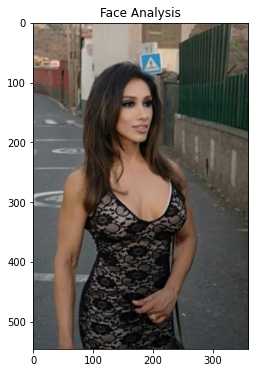

{   'age': 32,
    'dominant_emotion': 'sad',
    'dominant_race': 'asian',
    'emotion': {   'angry': 0.00426097321906127,
                   'disgust': 2.557756850762871e-06,
                   'fear': 1.0876263491809368,
                   'happy': 1.2795237824320793,
                   'neutral': 14.126573503017426,
                   'sad': 83.50198864936829,
                   'surprise': 3.1203359185383306e-05},
    'gender': 'Woman',
    'race': {   'asian': 32.73317217826843,
                'black': 4.5010872185230255,
                'indian': 26.209089159965515,
                'latino hispanic': 22.987256944179535,
                'middle eastern': 6.678696721792221,
                'white': 6.8907007575035095},
    'region': {'h': 88, 'w': 88, 'x': 131, 'y': 103}}


In [ ]:
from deepface import DeepFace
import pprint

img_path = "./training_faces/Nidia_1.jpg"
image = cv2.imread(img_path)

obj = DeepFace.analyze(img_path = img_path,
                       actions = ['age', 'gender', 'race', 'emotion'])
imshow("Face Analysis", image)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(obj)

#### **Create a simple function to display our results on the image**

In [ ]:
import cv2

def drawFace(img_path, obj):
  image = cv2.imread(img_path)
  x = obj['region']['x'] 
  y = obj['region']['y'] 
  h = obj['region']['h'] 
  w = obj['region']['w'] 
  age = obj['age']
  gender = obj['gender']
  gender = 'F' if gender == 'Woman' else 'M'
  dominant_emotion = obj['dominant_emotion']
  dominant_race = obj['dominant_race']
  dominant_emotion = obj['dominant_emotion']
  description = f'{age}{gender} - {dominant_emotion}'
  cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
  cv2.putText(image, description, (x,y-10) , cv2.FONT_HERSHEY_PLAIN,2, (0,255,0), 3)
  cv2.putText(image, dominant_race, (x,y+h+30) , cv2.FONT_HERSHEY_PLAIN,2, (0,255,0), 3)
  imshow("Face Analysis", image)

#### **Test on another image**

Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.02it/s]


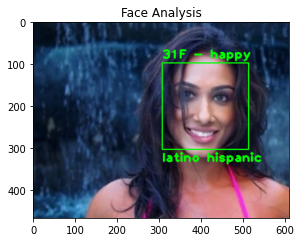

{   'age': 31,
    'dominant_emotion': 'happy',
    'dominant_race': 'latino hispanic',
    'emotion': {   'angry': 1.5877700931810068e-06,
                   'disgust': 4.319631285288174e-13,
                   'fear': 1.0311561500497834e-09,
                   'happy': 82.44474530220032,
                   'neutral': 17.555105686187744,
                   'sad': 1.642430191850508e-05,
                   'surprise': 0.00012907026984976255},
    'gender': 'Woman',
    'race': {   'asian': 19.253599643707275,
                'black': 8.695145696401596,
                'indian': 16.4439395070076,
                'latino hispanic': 36.599722504615784,
                'middle eastern': 8.111131936311722,
                'white': 10.896464437246323},
    'region': {'h': 206, 'w': 206, 'x': 308, 'y': 97}}


In [ ]:
from deepface import DeepFace
import pprint

img_path = "training_faces/Nidia_4.jpg"
image = cv2.imread(img_path)
obj = DeepFace.analyze(img_path = img_path, actions = ['age', 'gender', 'race', 'emotion'])
drawFace(img_path, obj)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(obj)

#### **Change backends of face detection**

Action: emotion: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


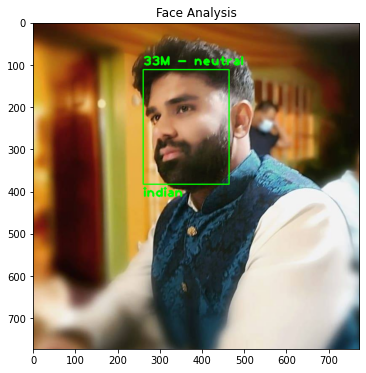

{   'age': 33,
    'dominant_emotion': 'neutral',
    'dominant_race': 'indian',
    'emotion': {   'angry': 30.702683329582214,
                   'disgust': 0.004675370655604638,
                   'fear': 7.692661881446838,
                   'happy': 19.26315873861313,
                   'neutral': 33.64163637161255,
                   'sad': 8.250836282968521,
                   'surprise': 0.44435043819248676},
    'gender': 'Man',
    'race': {   'asian': 3.9026084360351043,
                'black': 4.114786044980759,
                'indian': 30.54093652475637,
                'latino hispanic': 27.110272394386243,
                'middle eastern': 21.73965016130803,
                'white': 12.591741968185667},
    'region': {'h': 271, 'w': 203, 'x': 260, 'y': 112}}


In [ ]:
from deepface import DeepFace

# backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface']

img_path = "me.jpg"
image = cv2.imread(img_path)
obj = DeepFace.analyze(img_path = "me.jpg", actions = ['age', 'gender', 'race', 'emotion'], detector_backend = 'mtcnn')
drawFace(img_path, obj)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(obj)

## **4. Perform Facial Similarity**

In [ ]:
result  = DeepFace.verify("training_faces/Nidia_1.jpg", "training_faces/Nidia_3.jpg")
print("Is verified: ", result["verified"])
result

vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:31<00:00, 18.6MB/s]


Is verified:  True


{'distance': 0.26397512923194133,
 'max_threshold_to_verify': 0.4,
 'model': 'VGG-Face',
 'similarity_metric': 'cosine',
 'verified': True}

### **We can even use different Distance Metrics**

In [ ]:
#metrics = ["cosine", "euclidean", "euclidean_l2"]

result  = DeepFace.verify("training_faces/Nidia_1.jpg", "training_faces/Nidia_3.jpg", distance_metric = 'euclidean')
print("Is verified: ", result["verified"])
result

Is verified:  True


{'distance': 0.4745541024554582,
 'max_threshold_to_verify': 0.6,
 'model': 'VGG-Face',
 'similarity_metric': 'euclidean',
 'verified': True}

In [ ]:
#metrics = ["cosine", "euclidean", "euclidean_l2"]

result  = DeepFace.verify("training_faces/Nidia_1.jpg", "training_faces/Nidia_3.jpg", distance_metric = 'euclidean_l2')
print("Is verified: ", result["verified"])
result

Is verified:  True


{'distance': 0.7266018569091902,
 'max_threshold_to_verify': 0.86,
 'model': 'VGG-Face',
 'similarity_metric': 'euclidean_l2',
 'verified': True}

### **Download models as the existing DeepFace downloader has stopped working**

In [ ]:
!gdown --id 1OdJNKL85CCYStVi9XtJRpHhXo2FU6Gf1
!gdown --id 1GWIuvW3Vm3wMpGGEyTT7sU-c1cVWZIEc
!mv vgg_face_weights.h5 /root/.deepface/weights/vgg_face_weights.h5
!mv facenet_weights.h5 /root/.deepface/weights/facenet_weights.h5

Downloading...
From: https://drive.google.com/uc?id=1OdJNKL85CCYStVi9XtJRpHhXo2FU6Gf1
To: /content/vgg_face_weights.h5
100% 580M/580M [00:06<00:00, 91.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GWIuvW3Vm3wMpGGEyTT7sU-c1cVWZIEc
To: /content/facenet_weights.h5
100% 92.2M/92.2M [00:00<00:00, 153MB/s]


## **5. Perform Facial Recognition**

In [ ]:
from deepface import DeepFace
import pandas as pd

df = DeepFace.find(img_path = "./training_faces/Nidia_1.jpg", db_path = './training_faces/', detector_backend = 'ssd')
df

Representations stored in  ./training_faces/ / representations_vgg_face.pkl  file. Please delete this file when you add new identities in your database.
find function lasts  2.573969841003418  seconds


,identity,VGG-Face_cosine
0,./training_faces//Nidia_1.jpg,5.551115e-16
1,./training_faces//Nidia_4.jpg,1.512380e-01
2,./training_faces//Nidia_5.jpg,2.411932e-01
3,./training_faces//Nidia_3.jpg,2.667583e-01
4,./training_faces//Nidia_2.jpg,2.853285e-01
5,./training_faces//Nidia_6.jpg,2.862195e-01
6,./training_faces//jlo.jpg,3.823356e-01


## **We can even try a few different models**

In [ ]:
from deepface import DeepFace
import pandas as pd

dfs = []
models = ["VGG-Face", "Facenet", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib"]

for model in models:
   df = DeepFace.find(img_path = "./training_faces/Nidia_1.jpg", db_path = './training_faces/', model_name = model,  detector_backend = 'ssd')
   df['model'] = model
   dfs.append(df)

pd.concat(dfs)

There are  9  representations found in  representations_vgg_face.pkl
find function lasts  0.15557360649108887  seconds
There are  9  representations found in  representations_facenet.pkl
find function lasts  0.14350557327270508  seconds
There are  9  representations found in  representations_openface.pkl
find function lasts  0.15314841270446777  seconds
There are  9  representations found in  representations_deepface.pkl
find function lasts  0.1973128318786621  seconds
There are  9  representations found in  representations_deepid.pkl
find function lasts  0.12321281433105469  seconds
There are  9  representations found in  representations_arcface.pkl
find function lasts  0.137800931930542  seconds
There are  9  representations found in  representations_dlib.pkl
find function lasts  0.07892012596130371  seconds


,identity,VGG-Face_cosine,model,Facenet_cosine,OpenFace_cosine,DeepFace_cosine,DeepID_cosine,ArcFace_cosine,Dlib_cosine
0,./training_faces//Nidia_1.jpg,5.551115e-16,VGG-Face,NaN,NaN,NaN,NaN,NaN,NaN
1,./training_faces//Nidia_4.jpg,1.512380e-01,VGG-Face,NaN,NaN,NaN,NaN,NaN,NaN
2,./training_faces//Nidia_5.jpg,2.411932e-01,VGG-Face,NaN,NaN,NaN,NaN,NaN,NaN
3,./training_faces//Nidia_3.jpg,2.667583e-01,VGG-Face,NaN,NaN,NaN,NaN,NaN,NaN
4,./training_faces//Nidia_2.jpg,2.853285e-01,VGG-Face,NaN,NaN,NaN,NaN,NaN,NaN
5,./training_faces//Nidia_6.jpg,2.862195e-01,VGG-Face,NaN,NaN,NaN,NaN,NaN,NaN
6,./training_faces//jlo.jpg,3.823356e-01,VGG-Face,NaN,NaN,NaN,NaN,NaN,NaN
0,./training_faces//Nidia_1.jpg,NaN,Facenet,0.235439,NaN,NaN,NaN,NaN,NaN
1,./training_faces//Nidia_5.jpg,NaN,Facenet,0.297181,NaN,NaN,NaN,NaN,NaN
2,./training_faces//Nidia_4.jpg,NaN,Facenet,0.341438,NaN,NaN,NaN,NaN,NaN


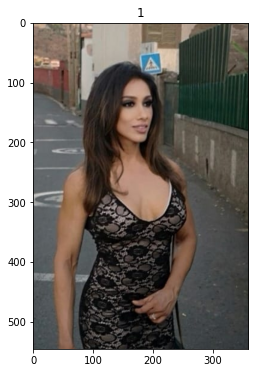

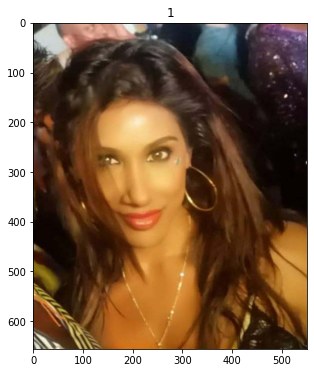

In [ ]:
imshow('1', cv2.imread('./training_faces/Nidia_1.jpg'))
imshow('1', cv2.imread('./training_faces/Nidia_5.jpg'))

Here's a great tutorial on building a MongoDB based system for facial recognition https://sefiks.com/2021/01/22/deep-face-recognition-with-mongodb/